# **Assignment**


## 1. How can we transform a text to numerical representation?​(Write any three of them with one line description)

1. Using replace method by creating a dictionary.
```
text_to_num = {
    'one': 1
}
df['num'] = df.replace(text_to_num)
df.head()
```


2. Encode categorical features as a one-hot numeric array
```
from sklearn.preprocessing import OneHotEncoder
text_to_neumeric = OneHotEncoder()
```

3. Use scikit-learn contrib package.

```
import category_encoders as ce

# Get a new clean dataframe
obj_df = df.select_dtypes(include=['object']).copy()
```

## 2. List (min) three things to evaluate a Classification model.

Precision, Recall and Specificity, which are three major performance metrics describing a predictive classification model


## 3. Develop a code for the following problem:

### a. Create a crawler for any news portal which can extract news events/information.

```
import scrapy


class NewsspiderSpider(scrapy.Spider):
    name = 'newsSpider'    
    start_urls = ['https://www.jugantor.com/archive/2022/02/17']

    def parse(self, response):
        for link in response.css('.col.mb-3').css('li a::attr(href)'):        
            yield response.follow(link.get(), callback=self.parse_news_page)                  
    
    def parse_news_page(self, response):
        try:
            yield {             
                'date_posted': response.css('.col-12.col-sm-12.col-md-6 div::text').get()[:25],
                'title': response.css('#news-title h3::text').get(),
                'auther': response.css('.col-12.col-sm-12.col-md-6 span::text').get(),
                'article_content': response.css('.news-element-text p::text').getall(),
                'link': response.url,           
                'category': response.css('.breadcrumb-item.active a::text').get(),
            }
        except:
            pass
```        

### b. Save all the extracted information into a csv/excel file with file name:news_portal_(date or page no).

Run this code on terminal.
```
scrapy crawl -o news_portal_17_02_2022.csv newsSpider
```

### c. Parameters to extract are as follows, Article Content, Date Posted, Tags, Author etc.

In [235]:
import pandas as pd
import numpy as np

In [236]:
news = pd.read_csv('hindustantimes_topics.csv')

In [237]:
for i in news.columns:
    print(i)

date_posted
title
auther
article_content
tags
link





## 4. Perform exploratory data analysis on the csv file you have created in previous question, retrieve named entities from articles as well.(EDA is a broad term.Example:- word count, topic modelling etc .Extra points for good analysis.)

In [238]:
news.head() # read first five column

,date_posted,title,auther,article_content,tags,link
0,"Feb 08, 2022 04:57 PM IST\n",HPBOSE term 1 results 2022: HP Board 12th resu...,hindustantimes.com,"Himachal Pradesh Board of School Education, Dh...","hp board +2 result,hpbose,hpbose.org",https://www.hindustantimes.com/education/exam-...
1,"Feb 10, 2022 08:37 PM IST\n",HP Board Class 10 Term 1 Result 2022 Live: HPB...,hindustantimes.com,HPBOSE class 10th Term 1 Results declared by t...,"hp board +2 result,hpbose",https://www.hindustantimes.com/education/board...
2,"n Jan 18, 2022 09:20 PM IST\n",BTS: J-Hope includes Magic Shop lyrics in self...,HT Entertainment Desk,BTS member J-Hope unveiled his personalised me...,"bts world,bts,bts video,k-pop",https://www.hindustantimes.com/entertainment/m...
3,"May 28, 2018 08:02 PM IST\n",CBSE 10th result: What students across India a...,NaN,Thousands of anxious and excited students acro...,"CBSE,exam result,result,CBSE board exam result...",https://www.hindustantimes.com/education/cbse-...
4,"n Feb 17, 2022 12:30 AM IST\n",Sagittarius Daily Horoscope for February 17: F...,NaN,SAGITTARIUS (Nov 23-Dec 21)This is going to be...,"sun signs,astrology,sagittarius horoscope,sagi...",https://www.hindustantimes.com/astrology/horos...


In [239]:
news.shape

(3911, 6)

In [240]:
news.isnull().sum(axis = 0)

date_posted           0
title               109
auther             1582
article_content     184
tags                604
link                  0
dtype: int64

In [241]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_posted      3911 non-null   object
 1   title            3802 non-null   object
 2   auther           2329 non-null   object
 3   article_content  3727 non-null   object
 4   tags             3307 non-null   object
 5   link             3911 non-null   object
dtypes: object(6)
memory usage: 183.5+ KB


In [242]:
print('Number of authors:', len(news['auther'].value_counts()))

Number of authors: 87


In [243]:
news['auther'].value_counts()[:30]

hindustantimes.com       1037
HT Entertainment Desk     823
HT Correspondent          120
Krishna Priya Pallavi      82
Parmita Uniyal             45
Nandini                    22
Gurjant Pannu              16
Faisal Malik                9
Deutsche Welle              8
Rezaul H Laskar             8
Shreya Bhandary             7
Naresh K Thakur             7
Utpal Parashar              6
Somshuvra Laha              6
Shishir Gupta               6
Rahul Singh                 6
Ritesh Mishra               5
Rasesh Mandani              5
Saubhadra Chatterji         5
Nikita Bisht                5
Anirudh Bhattacharyya       4
Ramesh Vinayak              4
Rhythma Kaul                4
Sweta Kaushal               4
Soumya Pillai               3
Shalini Gupta               3
Rajeev Mullick              3
Soumya Srivastava           3
Vivek Krishnan              2
Zia Haq                     2
Name: auther, dtype: int64

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='auther'>

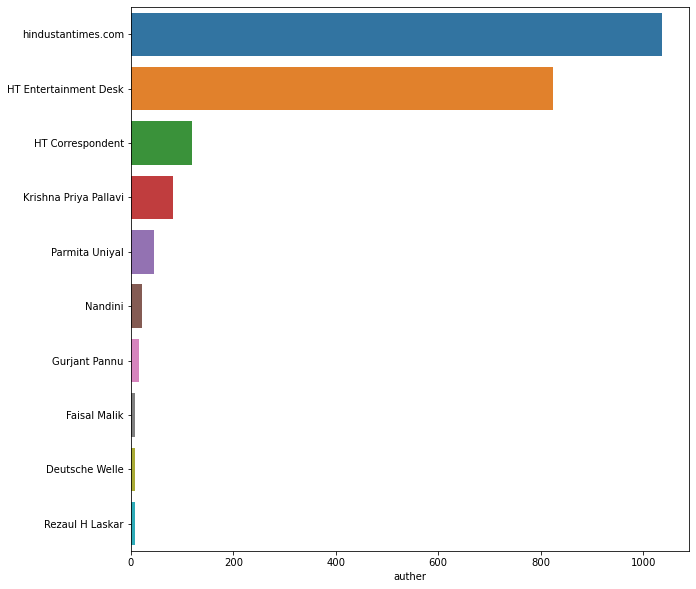

In [245]:
plt.figure(figsize=(10,10))
sns.barplot(y=news['auther'].value_counts().keys()[:10], x=news['auther'].value_counts()[:10])
plt.show()

In [251]:
len(news['article_content'][0].split(' '))-

164